In [9]:
from google.colab import drive

In [10]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


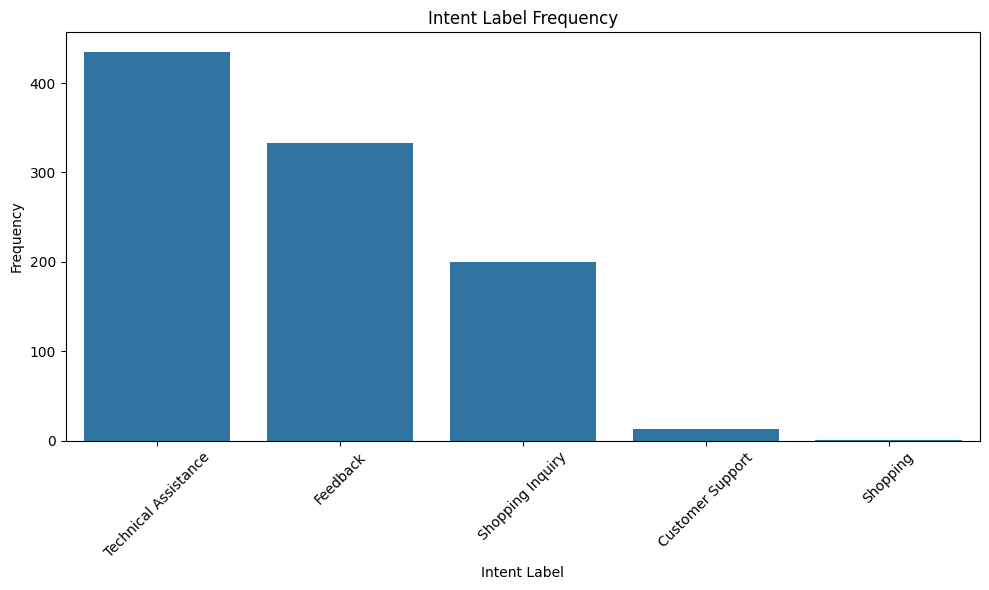

In [12]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Data/data.csv')
df = pd.DataFrame(data)

# Count the frequency of each intent
intent_counts = data['intent'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=intent_counts.index, y=intent_counts.values)
plt.title('Intent Label Frequency')
plt.xlabel('Intent Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
# Bag-of-words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text']).toarray()
y = df['intent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

Accuracy: 0.9390862944162437


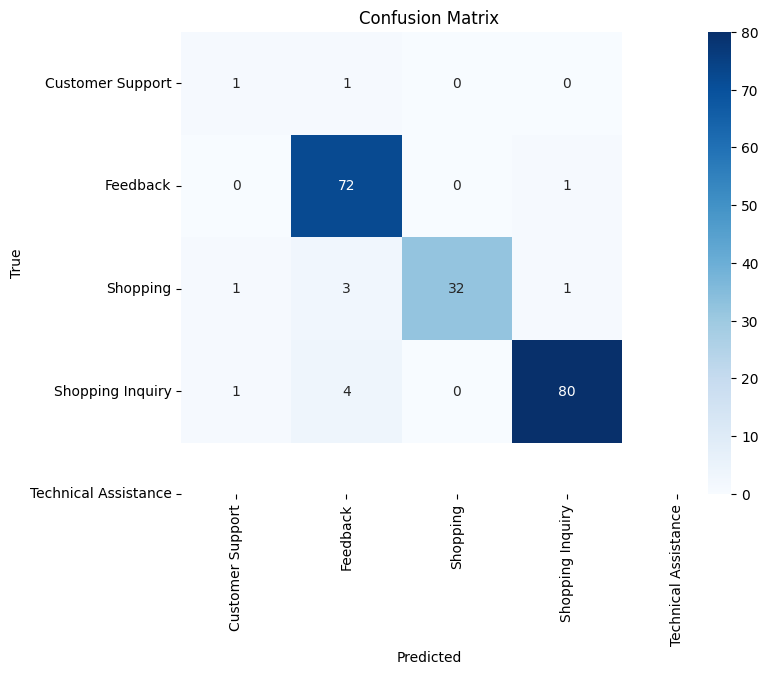

In [14]:
# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [15]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                      precision    recall  f1-score   support

    Customer Support       0.33      0.50      0.40         2
            Feedback       0.90      0.99      0.94        73
    Shopping Inquiry       1.00      0.86      0.93        37
Technical Assistance       0.98      0.94      0.96        85

            accuracy                           0.94       197
           macro avg       0.80      0.82      0.81       197
        weighted avg       0.95      0.94      0.94       197



In [18]:
# User input for custom text
custom_text = input("Enter your text: ")
custom_text_vectorized = vectorizer.transform([custom_text]).toarray()
predicted_intent = clf.predict(custom_text_vectorized)[0]
print("Predicted intent:", predicted_intent)

Enter your text: iss product ki delivery time kya hai?
Predicted intent: Shopping Inquiry
